In [1]:
import sys
import os
sys.path.append(os.getcwd() + '/../')

from dataset_utils import *
from main_nusc import data_path

import warnings
warnings.simplefilter("ignore")

In [19]:
traj = 32
with open(data_path + '/objects/%d.pkl' % traj, 'rb') as f:
    objects = pickle.load(f)

with open(data_path + '/metadata/%d.json' % traj, 'rb') as f:
    metadata = json.load(f)

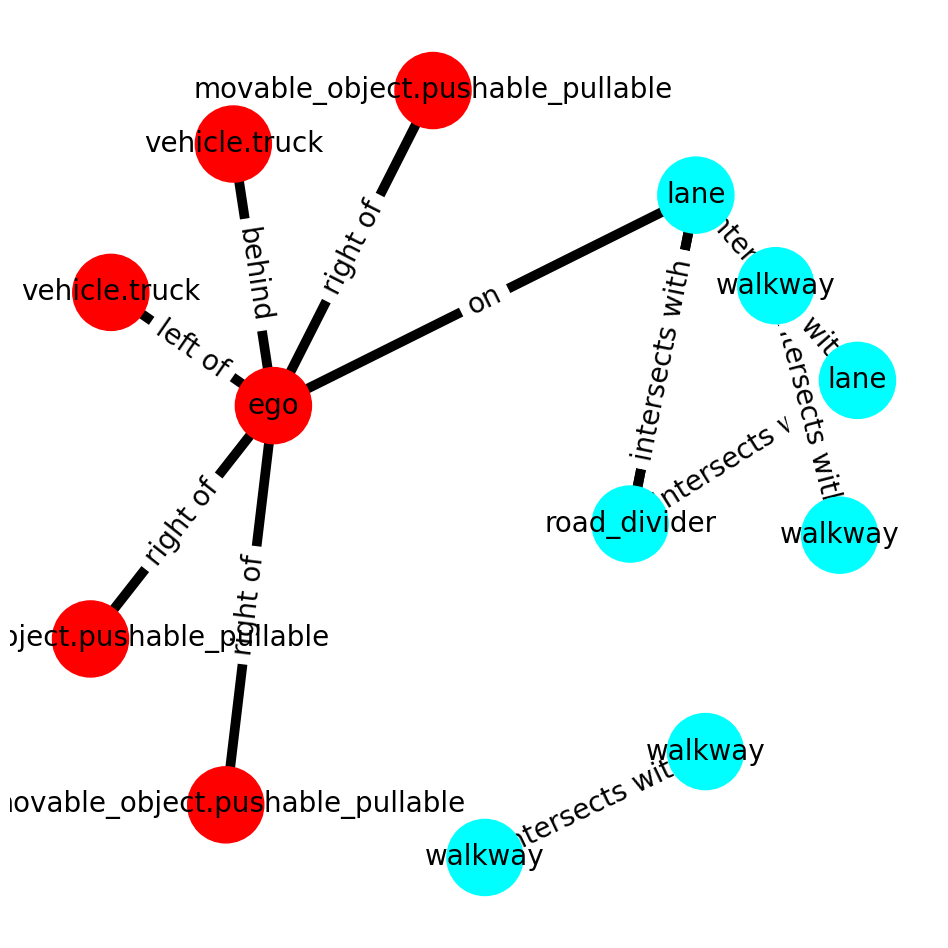

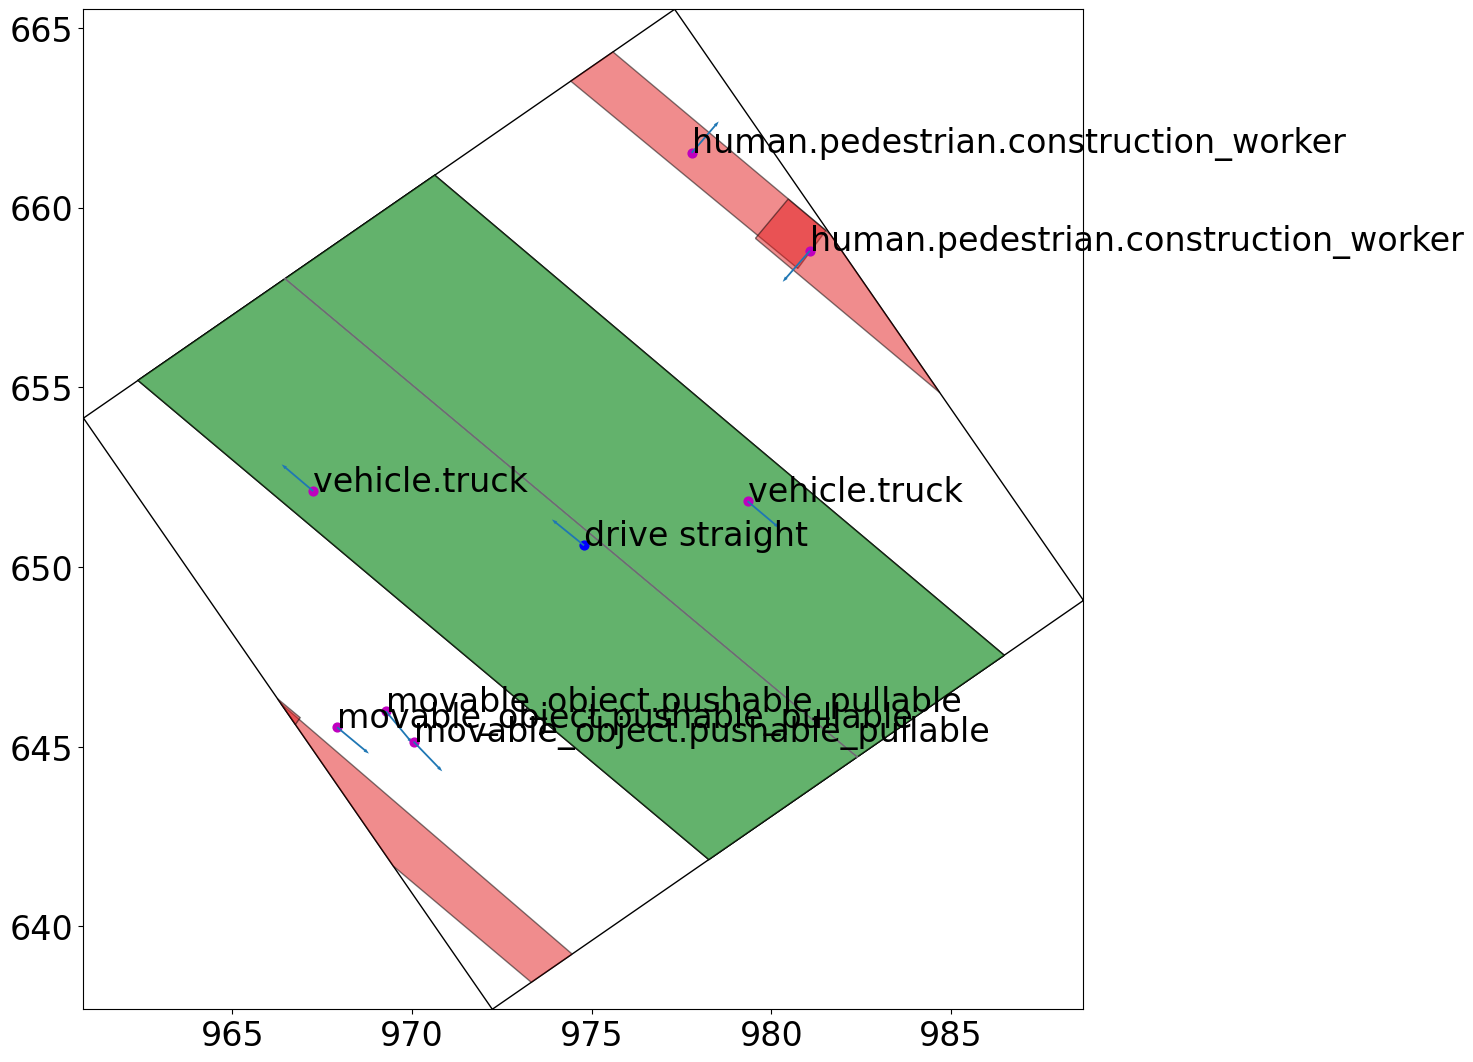

In [35]:
frame = 25
plt.rcParams['font.size'] = 24
sg = torch.load(data_path + '/scene_graphs_adj/%d.pt' % traj).int()
sg_fig = visualize_graph(sg[frame], metadata['object_tokens'], objects[frame], font_size=20, layout='spring', k=8, iterations=150,
                         excluded_layers=['drivable_area', 'road_segment', 'road_block'])

nusc_data = NuScenesSimple(data_path, [str(i) for i in range(64)])
frame = select_frame(nusc_data[traj], frame)
map_fig = render_frame(frame)

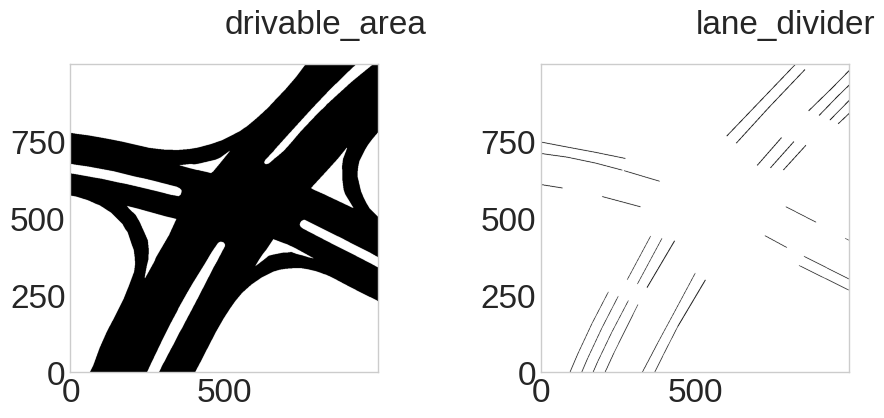

In [46]:
import matplotlib.pyplot as plt
import tqdm
import numpy as np

from nuscenes.map_expansion.map_api import NuScenesMap
from nuscenes.map_expansion import arcline_path_utils
from nuscenes.map_expansion.bitmap import BitMap

nusc_map = NuScenesMap(dataroot='/data/Datasets/nuscenes', map_name='singapore-onenorth')

patch_box = (300, 1700, 100, 100)
patch_angle = 0  # Default orientation where North is up
layer_names = ['drivable_area', 'lane_divider']
canvas_size = (1000, 1000)
map_mask = nusc_map.get_map_mask(patch_box, patch_angle, layer_names, canvas_size)
map_mask[0]

figsize = (12, 4)
fig, ax = nusc_map.render_map_mask(patch_box, patch_angle, layer_names, canvas_size, figsize=figsize, n_row=1)

In [ ]:
from dataset_utils import *
from main_nusc import data_path
nusc_data = NuScenesSimple(data_path, [str(i) for i in range(128)])

print('loaded, running')

plt.rcParams['font.size'] = 24

plt.ioff()
for i in range(128):
    for j in range(0, 35, 5):
        frame = select_frame(nusc_data[i], j)
        fig = render_frame(frame)
        fig.savefig('test_frames/test_frame_%d_%d.png' % (i, j) )

'''
print('trajectory')
render_trajectory('test_traj.gif', nusc_data[0])
print('rendered')
'''